In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

import os, glob

from libraries.read_lib import read_pgm

%load_ext autoreload
%matplotlib inline
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [10]:
%autoreload 2

In [11]:
source = os.path.realpath('../data/samples/')
print(source)

/var/abs/local/camera/data/samples


In [12]:
filelist = glob.glob(source + '/test*.ppm')
filelist.sort()
headlist = []
imlist = []
for file in filelist[-4:]:
    print(file)
    h, im = read_pgm(file)
    headlist.append(h)
    imlist.append(im)

#for f in glob.glob(source+'test*'):
#    os.remove(f)

/var/abs/local/camera/data/samples/test-0000000000.ppm
/var/abs/local/camera/data/samples/test-0000000001.ppm
/var/abs/local/camera/data/samples/test-0000000002.ppm
/var/abs/local/camera/data/samples/test-0000000003.ppm


In [35]:
im

array([[  0,   0,   0, ...,   0,  12,   4],
       [ 36,  56,  20, ...,  44,   0,   0],
       [  0,  12,  16, ...,  52,   4,   0],
       ..., 
       [  0,   0,   0, ..., 136,   0,  92],
       [ 36,  80,  16, ...,  88,   0, 200],
       [  0,  48,  44, ..., 176, 112,   0]], dtype=uint16)

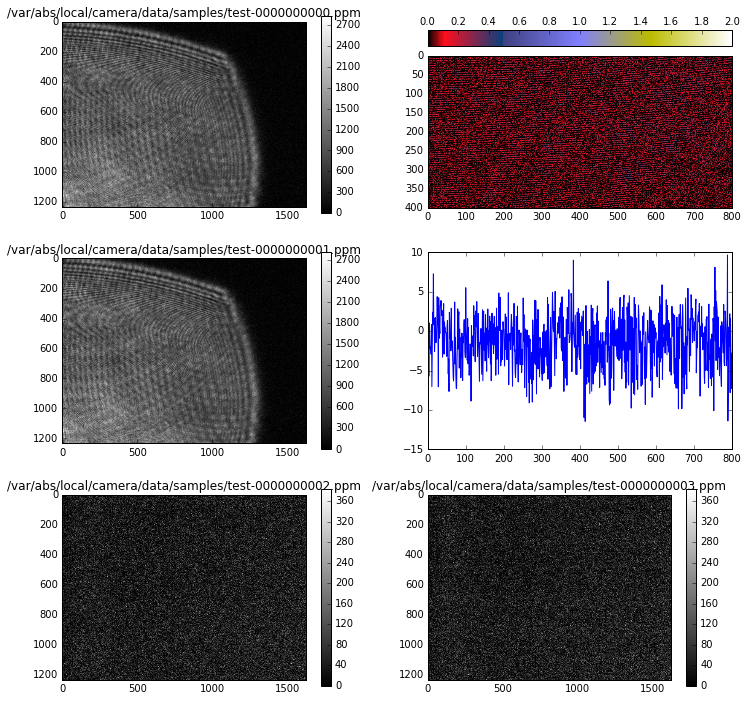

In [36]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (6*ncols,4*nrows))
gs = GridSpec(nrows, ncols, )
axes = [plt.subplot(gs[j,0]) for j in range(nrows)] + [plt.subplot(gs[-1,1])]

ax0 = plt.subplot(gs[0,1])
ax1 = plt.subplot(gs[1,1])

for j, (ax, im) in enumerate(zip(axes, imlist)):
    i = ax.imshow(im, cmap='gray',)
    cax, kw = make_axes(ax)
    ax.set_title(filelist[j])
    plt.colorbar(i, cax, **kw)
    
atoms, ref, b1, b2 = imlist
od_crop = (slice(800,1200), slice(200,1000))

#OD = -np.log((atoms[od_crop]-b1[od_crop])/(ref[od_crop]-b2[od_crop]+1))
OD = -np.log((atoms[od_crop])/(ref[od_crop]))

i2 = ax0.imshow(OD, cmap='gist_stern', vmin=0, vmax=2)
cax, kw = make_axes(ax0, 'top')
plt.colorbar(i2, cax=cax, **kw)

ax1.plot(OD.sum(0))

In [14]:
OD

array([[-0.36258874, -0.14141165, -0.18425155, ..., -0.05620892,
         0.43172587, -0.20626176],
       [-0.07635582,  0.13396482, -0.14744129, ...,  0.26390391,
         0.00872416,  0.5694107 ],
       [ 0.02102574,  0.2898429 ,  0.1642665 , ...,  0.09378014,
         0.24613307, -0.07183658],
       ..., 
       [-0.00987662,  0.00765554, -0.00382044, ...,  0.1264449 ,
         0.19172327, -0.06225   ],
       [ 0.0357471 ,  0.10331761,  0.02939227, ...,  0.31122423,
        -0.03214973, -0.15988388],
       [ 0.02699827, -0.20351646,  0.13023302, ..., -0.03306086,
         0.09442908, -0.05988693]])

In [15]:
OD.max()

1.3247968965580983

In [16]:
OD.min()

-1.3357691159252421

In [17]:
#b = ((2**16/OD.max()) * (OD + abs(OD.min())) )
#b = (OD + abs(OD.min())) * 6553.6 + 1
b = OD * 6553.6

In [37]:
b[b<0] = 0

In [38]:
b.min()

0.0

In [39]:
b.max()

8682.1889412831533

In [40]:
c = b 

In [41]:
c

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,  2829.35864591,     0.        ],
       [    0.        ,   877.95187509,     0.        , ...,
         1729.52066886,    57.17462654,  3731.6899904 ],
       [  137.79430084,  1899.51443325,  1076.53691413, ...,
          614.59751059,  1613.05768453,     0.        ],
       ..., 
       [    0.        ,    50.17134551,     0.        , ...,
          828.66926803,  1256.4776049 ,     0.        ],
       [  234.27222262,   677.10231529,   192.62518151, ...,
         2039.63913135,     0.        ,     0.        ],
       [  176.93583105,     0.        ,   853.49511351, ...,
            0.        ,   618.85041443,     0.        ]])

In [42]:
c.min()

0.0

In [43]:
c.max()

8682.1889412831533

In [44]:
d = c.astype(np.uint16)+1

In [45]:
d

array([[   1,    1,    1, ...,    1, 2830,    1],
       [   1,  878,    1, ..., 1730,   58, 3732],
       [ 138, 1900, 1077, ...,  615, 1614,    1],
       ..., 
       [   1,   51,    1, ...,  829, 1257,    1],
       [ 235,  678,  193, ..., 2040,    1,    1],
       [ 177,    1,  854, ...,    1,  619,    1]], dtype=uint16)

In [46]:
d.min()

1

In [47]:
d.max()

8683

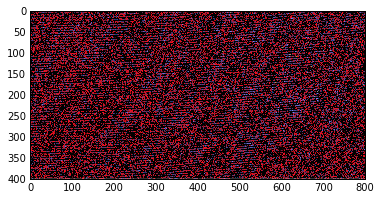

In [49]:
imshow(c,interpolation='none', cmap='gist_stern')
show()

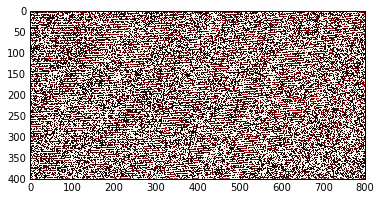

In [71]:
imshow(c[:,:]/6553.6 +1,interpolation='none', cmap='gist_stern')
show()

In [6]:
x = np.asarray([-12])

In [7]:
print(x.astype(np.uint16))

[65524]
